<a href="https://colab.research.google.com/github/Karancse/Bank_Note_Authentication_using_MLDM/blob/main/KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt")
data

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
data.columns = ['VWT','SWT','CWT','E','C']

In [ ]:
df = data.drop(['E'],axis=1)
df.head()

,VWT,SWT,CWT,C
0,4.54590,8.1674,-2.4586,0
1,3.86600,-2.6383,1.9242,0
2,3.45660,9.5228,-4.0112,0
3,0.32924,-4.4552,4.5718,0
4,4.36840,9.6718,-3.9606,0


In [ ]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df = pd.DataFrame(x_scaled)
normalized_df.columns = ['VWT','SWT','CWT','C']

print(normalized_df)

           VWT       SWT       CWT    C
0     0.835659  0.820982  0.121804  0.0
1     0.786629  0.416648  0.310608  0.0
2     0.757105  0.871699  0.054921  0.0
3     0.531578  0.348662  0.424662  0.0
4     0.822859  0.877275  0.057100  0.0
...        ...       ...       ...  ...
1366  0.537124  0.565855  0.165249  1.0
1367  0.407690  0.332868  0.506753  1.0
1368  0.237385  0.011768  0.985603  1.0
1369  0.250842  0.201701  0.761587  1.0
1370  0.324528  0.490747  0.343348  1.0

[1371 rows x 4 columns]


In [ ]:
df = normalized_df

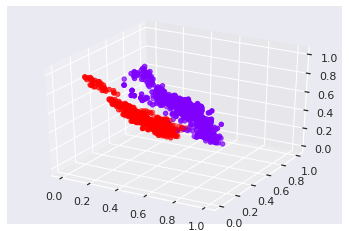

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

z_axis = df['SWT']
x_axis = df['VWT']
y_axis = df['CWT']
ax.scatter3D(x_axis, y_axis, z_axis, c=df['C'], cmap='rainbow')


Text(0, 0.5, 'WCSS')

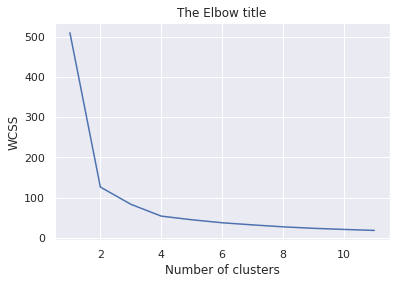

In [ ]:
wcss=[]
for i in range(1,12):
  kmeans = KMeans(i)
  kmeans.fit(df)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,12)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


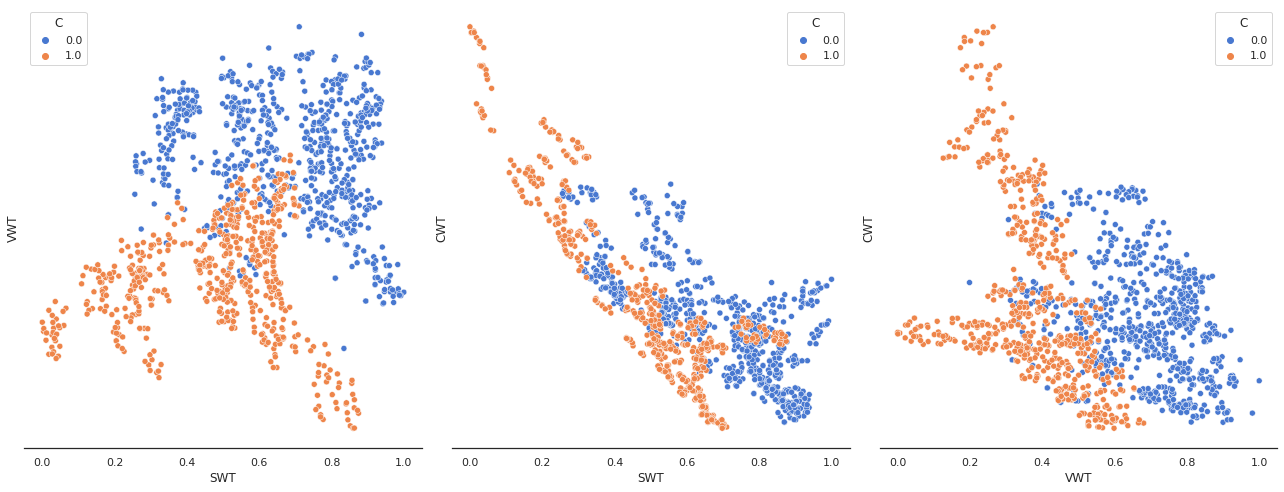

In [ ]:
sns.set(style="white", palette="muted", color_codes=True)


f, axes = plt.subplots(1, 3, figsize=(18, 7), sharex=True)
sns.despine(left=True)

sns.scatterplot(df['SWT'],df['VWT'], hue=df['C'], cmap='rainbow', ax=axes[0])
sns.scatterplot(df['SWT'],df['CWT'], hue=df['C'], cmap='rainbow', ax=axes[1])
sns.scatterplot(df['VWT'],df['CWT'], hue=df['C'], cmap='rainbow', ax=axes[2])


plt.setp(axes, yticks=[])
plt.tight_layout()

In [ ]:
kmeans = KMeans(4)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
identified_clusters = kmeans.fit_predict(df)
identified_clusters

array([1, 3, 1, ..., 2, 2, 0], dtype=int32)

In [ ]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 

#plt.scatter(data_with_clusters['SWT'],data_with_clusters['CWT'],c=data_with_clusters['Clusters'],cmap='rainbow')

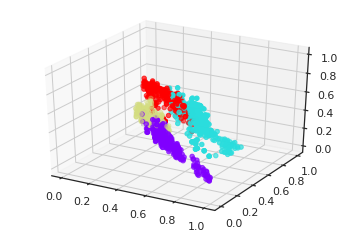

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

z_axis = df['VWT']
x_axis = df['SWT']
y_axis = df['CWT']
ax.scatter3D(x_axis, y_axis, z_axis, c=data_with_clusters['Clusters'], cmap='rainbow' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


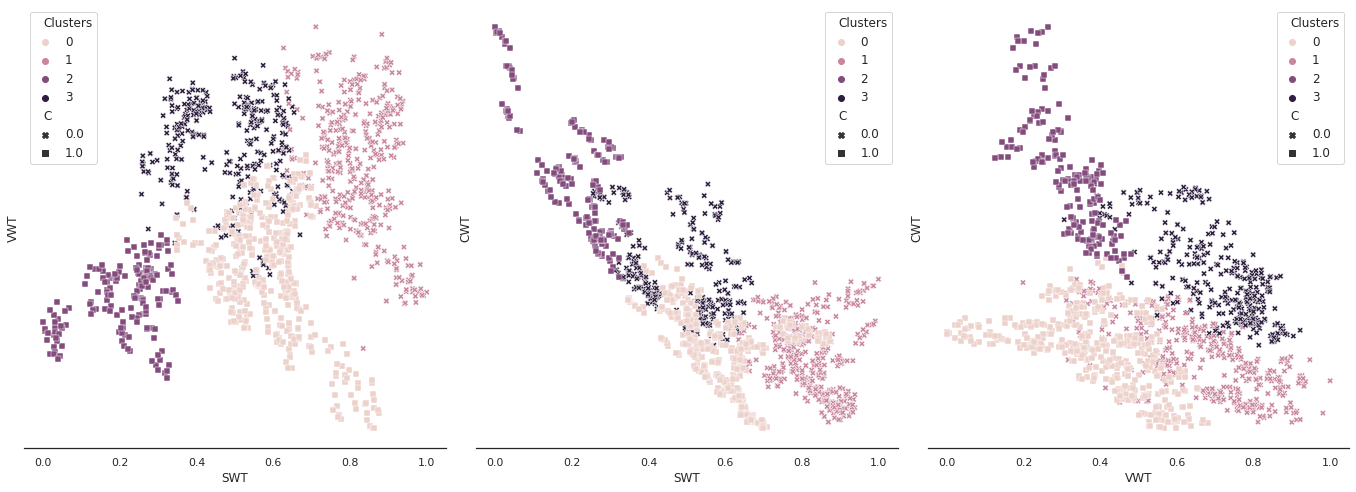

In [ ]:
sns.set(style="white", palette="muted", color_codes=True)


f, axes = plt.subplots(1, 3, figsize=(19, 7), sharex=True)
sns.despine(left=True)

sns.scatterplot(df['SWT'],df['VWT'], hue=data_with_clusters['Clusters'], cmap='rainbow', style=df['C'], markers = {0: "X", 1: "s"}, ax=axes[0])
sns.scatterplot(df['SWT'],df['CWT'], hue=data_with_clusters['Clusters'], cmap='rainbow', style=df['C'], markers = {0: "X", 1: "s"}, ax=axes[1])
sns.scatterplot(df['VWT'],df['CWT'], hue=data_with_clusters['Clusters'], cmap='rainbow', style=df['C'], markers = {0: "X", 1: "s"}, ax=axes[2])
plt.setp(axes, yticks=[])
plt.tight_layout()